![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 2 - Clasificación de género de películas

El propósito de este proyecto es que puedan poner en práctica, en sus respectivos grupos de trabajo, sus conocimientos sobre técnicas de preprocesamiento, modelos predictivos de NLP, y la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 2: Clasificación de género de películas"

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 8. Sin embargo, es importante que avancen en la semana 7 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 8, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/2c54d005f76747fe83f77fbf8b3ec232).

## Datos para la predicción de género en películas

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/moviegenre.png)

En este proyecto se usará un conjunto de datos de géneros de películas. Cada observación contiene el título de una película, su año de lanzamiento, la sinopsis o plot de la película (resumen de la trama) y los géneros a los que pertenece (una película puede pertenercer a más de un género). Por ejemplo:
- Título: 'How to Be a Serial Killer'
- Plot: 'A serial killer decides to teach the secrets of his satisfying career to a video store clerk.'
- Generos: 'Comedy', 'Crime', 'Horror'

La idea es que usen estos datos para predecir la probabilidad de que una película pertenezca, dada la sinopsis, a cada uno de los géneros.

Agradecemos al profesor Fabio González, Ph.D. y a su alumno John Arevalo por proporcionar este conjunto de datos. Ver https://arxiv.org/abs/1702.01992

## Ejemplo predicción conjunto de test para envío a Kaggle
En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from nltk.stem import WordNetLemmatizer

In [3]:
import nltk
nltk.download('wordnet')
#nltk.download('all')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/MIAD_ML_and_NLP/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)
#PATH = "G:/Mi unidad/Cursos/Maestria MIAD/2.2_Machine Learning y Procesamiento de Lenguaje Natural/Proyecto 2/"
#dataTraining = pd.read_csv(PATH+"dataTraining.zip", encoding='UTF-8', index_col=0)
#dataTesting = pd.read_csv(PATH+"dataTesting-1.zip", encoding='UTF-8', index_col=0)

In [5]:
# Visualización datos de entrenamiento
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [6]:
# Visualización datos de test
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [7]:
# Definición de variables predictoras (X)
vect = CountVectorizer(max_features=1000,stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [8]:
# Definición de variable de interés (y)
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [9]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

In [ ]:
# Definición y entrenamiento
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clf.fit(X_train, y_train_genres)

In [ ]:
# Predicción del modelo de clasificación
y_pred_genres = clf.predict_proba(X_test)

# Impresión del desempeño del modelo
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

In [ ]:
# transformación variables predictoras X del conjunto de test
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clf.predict_proba(X_test_dtm)

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.115936,0.097742,0.023667,0.033171,0.350883,0.121593,0.038935,0.501625,0.063223,0.112052,...,0.025849,0.066989,0.000080,0.326915,0.056593,0.007746,0.018275,0.181140,0.022994,0.019033
4,0.130519,0.094593,0.022446,0.061130,0.342924,0.219128,0.054908,0.525471,0.064037,0.065071,...,0.023979,0.065996,0.000439,0.172190,0.056970,0.009183,0.018986,0.208753,0.027562,0.019623
5,0.219088,0.116916,0.019175,0.092303,0.278692,0.460124,0.030849,0.595520,0.071616,0.081798,...,0.023715,0.321541,0.000946,0.275059,0.109710,0.015096,0.079912,0.411733,0.038717,0.023842
6,0.127627,0.107679,0.020988,0.078919,0.306709,0.143099,0.052145,0.561950,0.070046,0.072690,...,0.065193,0.115011,0.001434,0.227025,0.104296,0.008812,0.040535,0.225721,0.069887,0.017461
7,0.177181,0.173984,0.042258,0.035765,0.351817,0.260977,0.037887,0.407981,0.103738,0.132132,...,0.033129,0.082387,0.000071,0.169272,0.281801,0.008559,0.032381,0.243971,0.023557,0.037470


# FUNCIONES

In [10]:
def guardar(modelo,XTest,nombre):
    ypred = modelo.predict_proba(XTest)
    cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']
    ypred = pd.DataFrame(ypred,index=dataTesting.index, columns=cols)
    # Guardar predicciones en formato exigido en la competencia de kaggle
    archivo = nombre + '.csv'
    ypred.to_csv(archivo, index_label='ID')
    return ypred

In [11]:
def calculo_metrica(ypred,yTest,ypredTr,yTrain):
    AUC_Tr = roc_auc_score(yTrain, ypredTr, average='macro')
    AUC = roc_auc_score(yTest, ypred, average='macro')
    
    R2_Tr = r2_score(yTrain, ypredTr)
    R2 = r2_score(yTest, ypred)
    
    # Cálculo del desempeño del modelo utilizando el RMSE y el MAE
    print(f'El AUC del modelo es de {AUC}')
    print(f'El R2 del modelo es de {R2}')

    print(f'\nEl AUC del modelo en Train es de {AUC_Tr}')
    print(f'El R2 del modelo en Train es de {R2_Tr}')

In [12]:
wordnet_lemmatizer = WordNetLemmatizer()
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

# PREPROCESAMIENTO DATOS

Probar:

1. CountVectorizer con StopWords, 
2. lematización (ingles), 
3. y con  TfidfVectorizer

## Unigramas, bigramas, trigramas, stopwords y lematización

In [13]:
vect4 = CountVectorizer(lowercase=True, ngram_range=(1, 1), stop_words='english', analyzer=split_into_lemmas,max_features=30000)
X_vec_4 = vect4.fit_transform(dataTraining['plot'])
XTrain4, XTest4, yTrain4, yTest4 = train_test_split(X_vec_4, y_genres, test_size=0.15, random_state=8)

In [ ]:
clfRF4 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain4, yTrain4)
ypredTrRF4 = clfRF4.predict_proba(XTrain4)
ypredRF4 = clfRF4.predict_proba(XTest4)

calculo_metrica(ypredRF4, yTest4, ypredTrRF4, yTrain4)

El AUC del modelo es de 0.8228839704379366
El R2 del modelo es de 0.17453607688615722

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.883384594976882


## Stop words

In [14]:
vect2 = CountVectorizer(lowercase=True, stop_words='english',max_features=1000)
X_vec_2 = vect2.fit_transform(dataTraining['plot'])
XTrain2, XTest2, yTrain2, yTest2 = train_test_split(X_vec_2, y_genres, test_size=0.33, random_state=42)

In [ ]:
clfRF2 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain2, yTrain2)
ypredTrRF2 = clfRF2.predict_proba(XTrain2)
ypredRF2 = clfRF2.predict_proba(XTest2)

calculo_metrica(ypredRF2, yTest2, ypredTrRF2, yTrain2)

El AUC del modelo es de 0.7612499400923003
El R2 del modelo es de 0.13823759611143463

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8821950251175578


## Max features 1000

In [ ]:
ypredTr = clf.predict_proba(X_train)
ypred = clf.predict_proba(X_test)

calculo_metrica(ypred, y_test_genres, ypredTr, y_train_genres)

El AUC del modelo es de 0.7703737131620141
El R2 del modelo es de 0.09011875118854669

El AUC del modelo en Train es de 0.9400828495118548
El R2 del modelo en Train es de 0.268097978664562


## Unigramas, bigramas, trigramas

In [ ]:
vect1 = CountVectorizer(lowercase=True, ngram_range=(1, 1))
X_vec_1 = vect1.fit_transform(dataTraining['plot'])
XTrain1, XTest1, yTrain1, yTest1 = train_test_split(X_vec_1, y_genres, test_size=0.33, random_state=42)

In [ ]:
clfRF1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain1, yTrain1)
ypredTrRF1 = clfRF1.predict_proba(XTrain1)
ypredRF1 = clfRF1.predict_proba(XTest1)

calculo_metrica(ypredRF1, yTest1, ypredTrRF1, yTrain1)

El AUC del modelo es de 0.7925846141798107
El R2 del modelo es de 0.15556153119123095

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8844611554305887


## Lematización

In [ ]:
vect3 = CountVectorizer(lowercase=True, analyzer=split_into_lemmas)
X_vec_3 = vect3.fit_transform(dataTraining['plot'])
XTrain3, XTest3, yTrain3, yTest3 = train_test_split(X_vec_3, y_genres, test_size=0.33, random_state=42)

In [ ]:
clfRF3 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain3, yTrain3)
ypredTrRF3 = clfRF3.predict_proba(XTrain3)
ypredRF3 = clfRF3.predict_proba(XTest3)

calculo_metrica(ypredRF3, yTest3, ypredTrRF3, yTrain3)

El AUC del modelo es de 0.7980287385971042
El R2 del modelo es de 0.1540170767051151

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8845257399389096


## TfidfVectorizer

In [ ]:
vect5 = TfidfVectorizer(lowercase=True, stop_words='english')
X_vec_5 = vect5.fit_transform(dataTraining['plot'])
XTrain5, XTest5, yTrain5, yTest5 = train_test_split(X_vec_5, y_genres, test_size=0.33, random_state=42)

In [ ]:
clfRF5 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, random_state=42)).fit(XTrain5, yTrain5)
ypredTrRF5 = clfRF5.predict_proba(XTrain5)
ypredRF5 = clfRF5.predict_proba(XTest5)

calculo_metrica(ypredRF5, yTest5, ypredTrRF5, yTrain5)

El AUC del modelo es de 0.7967147889754017
El R2 del modelo es de 0.15910156567739364

El AUC del modelo en Train es de 1.0
El R2 del modelo en Train es de 0.8850786523903759


# CALIBRACIÓN

## Random Forest

In [ ]:
clfRF1 = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))
clfRF1.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=10, n_jobs=-1,
                                                     random_state=42))

In [ ]:
ypredTrRF1 = clfRF1.predict_proba(X_train)
ypredRF1 = clfRF1.predict_proba(X_test)
calculo_metrica(ypredRF1,y_test_genres,ypredTrRF1,y_train_genres)

El AUC del modelo es de 0.7703737131620141
El R2 del modelo es de 0.09011875118854669

El AUC del modelo en Train es de 0.9400828495118548
El R2 del modelo en Train es de 0.268097978664562


### RF Calibración 1

In [ ]:
max_depth_range = range(1,35,2)
max_features_range = range(5,40)
min_samples_leaf_range = range(1,10)
min_samples_split = range(1,50,2)
estimator_range = [10,50,100,200,500,750,1000]
auc=[]
param=[]

El parámetro max_depth que mejor calibra el modelo es 17
El parámetro max_depth que mejor calibra el modelo es 33


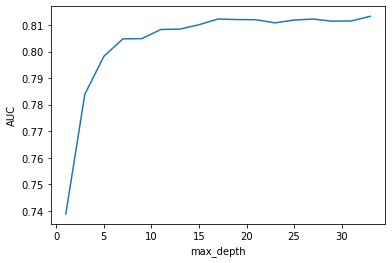

In [ ]:
for max_depth in max_depth_range:
    reg = RandomForestClassifier(max_depth = max_depth, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro max_depth que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_depth que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro max_feature que mejor calibra el modelo es 32
El parámetro max_feature que mejor calibra el modelo es 36


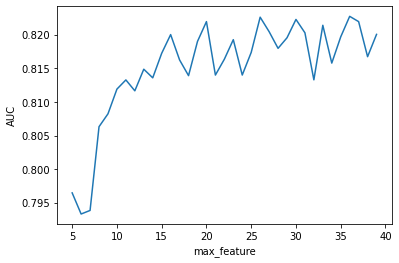

In [ ]:
auc=[]
param=[]
for feauture in max_features_range:
    reg = RandomForestRegressor(max_depth = 33,  max_features = feauture, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(feauture)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_features_range, auc)
plt.xlabel('max_feature')
plt.ylabel('AUC')

print(f'El parámetro max_feature que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_feature que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min leaf que mejor calibra el modelo es 4
El parámetro min leaf que mejor calibra el modelo es 4


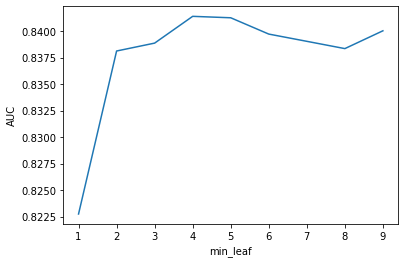

In [ ]:
auc=[]
param=[]
for min_leaf in min_samples_leaf_range:
    reg = RandomForestRegressor(max_depth = 33,  max_features = 36, min_samples_leaf = min_leaf, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(min_leaf)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_leaf_range, auc)
plt.xlabel('min_leaf')
plt.ylabel('AUC')

print(f'El parámetro min leaf que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min leaf que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro min split que mejor calibra el modelo es 1
El parámetro min split que mejor calibra el modelo es 1


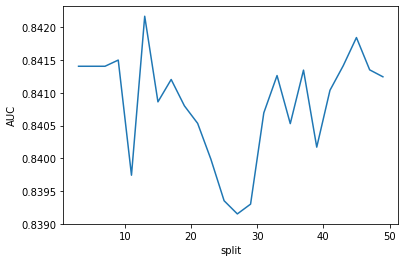

In [ ]:
auc=[]
param=[]
for split in min_samples_split:
    reg = RandomForestRegressor(max_depth = 33,  max_features = 36, min_samples_leaf = 4, min_samples_split=split, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(split)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_samples_split, auc)
plt.xlabel('split')
plt.ylabel('AUC')

print(f'El parámetro min split que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro min split que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro estimator que mejor calibra el modelo es 7
El parámetro estimator que mejor calibra el modelo es 1000


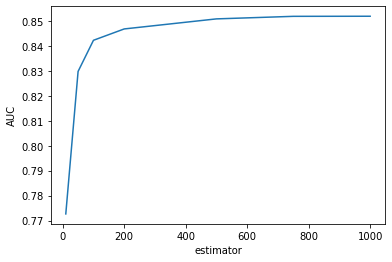

In [ ]:
auc=[]
param=[]
for estimator in estimator_range:
    reg = RandomForestRegressor(max_depth = 33,  max_features = 36, min_samples_leaf = 4, min_samples_split=13,n_estimators=estimator, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(estimator)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(estimator_range, auc)
plt.xlabel('estimator')
plt.ylabel('AUC')

print(f'El parámetro estimator que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro estimator que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro max_depth que mejor calibra el modelo es 17
El parámetro max_depth que mejor calibra el modelo es 33


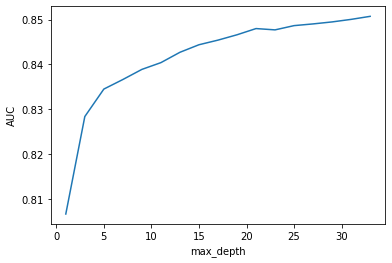

In [ ]:
auc=[]
param=[]
for max_depth in max_depth_range:
    reg = RandomForestRegressor(max_depth = max_depth, max_features = 36, min_samples_leaf = 4, min_samples_split=13,n_estimators=500, n_jobs=-1,random_state=8)
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro max_depth que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro max_depth que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [ ]:
clfRF21 = OneVsRestClassifier(RandomForestClassifier(max_depth = 33, max_features = 36, min_samples_leaf = 4, min_samples_split = 13, n_estimators=500, n_jobs=-1,random_state=8))
clfRF21.fit(XTrain4, yTrain4)
ypredTrRF2 = clfRF21.predict_proba(XTrain4)
ypredRF2 = clfRF21.predict_proba(XTest4)

calculo_metrica(ypredRF2, yTest4, ypredTrRF2, yTrain4)

El AUC del modelo es de 0.82330500365191
El R2 del modelo es de 0.1491979092910368

El AUC del modelo en Train es de 0.9866551256276566
El R2 del modelo en Train es de 0.3728736524392131


In [ ]:
X_test_dtm = vect2.transform(dataTesting['plot'])
guardar(regRF2,X_test_dtm,"RF1_opt")

ValueError: Must pass 2-d input. shape=(24, 3383, 2)

In [ ]:
X_test_dtm = vect2.transform(dataTesting['plot'])
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

# Predicción del conjunto de test
y_pred_test_genres = clfRF21.predict_proba(X_test_dtm)

# Guardar predicciones en formato exigido en la competencia de kaggle
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)
res.to_csv('RF_op1.csv', index_label='ID')
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
1,0.097205,0.089558,0.019884,0.031337,0.349968,0.117599,0.032763,0.498448,0.062726,0.100186,...,0.051367,0.060418,0.000075,0.347146,0.047831,0.016613,0.018564,0.174757,0.018605,0.017646
4,0.104273,0.094230,0.031378,0.054876,0.334477,0.174717,0.042867,0.528538,0.070962,0.047878,...,0.029876,0.051700,0.000542,0.146826,0.038398,0.009322,0.012048,0.190885,0.026132,0.013099
5,0.179541,0.098119,0.021050,0.079601,0.281750,0.459855,0.045956,0.650316,0.067582,0.092579,...,0.064097,0.248410,0.000343,0.287726,0.097470,0.011438,0.038280,0.434039,0.057276,0.032586
6,0.153771,0.102732,0.016300,0.058946,0.311637,0.129329,0.075960,0.580797,0.068316,0.067708,...,0.048648,0.107899,0.002598,0.270265,0.123639,0.006031,0.031832,0.302042,0.072363,0.022577
7,0.210300,0.144137,0.021058,0.055252,0.328511,0.249707,0.057604,0.394253,0.077430,0.149217,...,0.030345,0.097792,0.001181,0.200954,0.313086,0.016419,0.019441,0.280485,0.026034,0.021887


## XGB

In [ ]:
#n_estimators=1000, scale_pos_weight=1, reg_alpha= 0.005
param_test = {
    'learning_rate':[0.01,0.05,0.1,0.15],
    'gamma':[i/10.0 for i in range(0,5)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'max_depth':[6,8,10],
    'min_child_weight':[4,5,6],
    'subsample':[i/10.0 for i in range(6,10)]
}
gsearch2 = GridSearchCV(estimator = OneVsRestClassifier(XGBRegressor(n_jobs=-1,seed=8)), 
 param_grid = param_test, scoring='auc',n_jobs=-1, cv=3, verbose=True)
gsearch2.fit(XTrain,yTrain)
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test = {
    'n_estimators':[i for i in range(100,750,50)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.15, max_depth=10, min_child_weight=6,gamma=0,
                                                 subsample=0.9, colsample_bytree=0.6, nthread=4, scale_pos_weight=1, 
                                                 reg_alpha= 0.005,seed=27, n_jobs=-1),
                        param_grid = param_test, scoring='neg_root_mean_squared_error',n_jobs=-1, cv=3, verbose=True)
gsearch3.fit(XTrain,yTrain)
gsearch3.best_params_, gsearch2.best_score_

In [ ]:
# Definición método GridSearch para la calibración de parámetros definidos en nn_params
#OneVsRestClassifier()
modelo = XGBClassifier(n_jobs=-1,seed=8)
param_test = {
    'learning_rate':[0.01,0.05,0.1,0.15],
    'gamma':[i/10.0 for i in range(0,5)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'max_depth':[6,8,10],
    'min_child_weight':[4,5,6],
    'subsample':[i/10.0 for i in range(6,10)]}
    
rs = RandomizedSearchCV(modelo, param_distributions=param_test, n_iter=5, cv=3)
rs.fit(XTrain2, yTrain2)

print('Los mejores parametros segun Randomnized Search:', rs.best_params_)
print('Los mejores parametros segun Randomnized Search:', rs.best_score_)

Los mejores parametros segun Randomnized Search: {'subsample': 0.9, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.7}
Los mejores parametros segun Randomnized Search: 0.09377954244658726


In [ ]:
# Implementación y ajuste del modelo de regresión de Random Forest calibrado con los datos de entrenamiento
regXGB1 = OneVsRestClassifier(XGBClassifier(learning_rate = 0.15, n_estimators=300, max_depth=10, min_child_weight=5, 
                       gamma=0.3, subsample=0.9, colsample_bytree=0.7, nthread=4, reg_alpha= 0.01, 
                       seed=27, n_jobs=-1)).fit(XTrain2, yTrain2)

In [ ]:
ypredTrXGB1 = regXGB1.predict_proba(XTrain2)
ypredXGB1 = regXGB1.predict_proba(XTest2)
calculo_metrica(ypredXGB1,yTest2,ypredTrXGB1,yTrain2)

El AUC del modelo es de 0.8002062029495267
El R2 del modelo es de 0.1560865781317184

El AUC del modelo en Train es de 0.9738304482214067
El R2 del modelo en Train es de 0.6443343578213744


In [ ]:
# Implementación y ajuste del modelo de regresión de Random Forest calibrado con los datos de entrenamiento
regXGB = XGBClassifier(learning_rate = 0.15, n_estimators=300, max_depth=10, min_child_weight=5, 
                       gamma=0.3, subsample=0.9, colsample_bytree=0.7, nthread=4, reg_alpha= 0.01, 
                       seed=27, n_jobs=-1).fit(XTrain2, yTrain2)

In [ ]:
ypredTrXGB = regXGB.predict_proba(XTrain2)
ypredXGB = regXGB.predict_proba(XTest2)
calculo_metrica(ypredXGB,yTest2,ypredTrXGB,yTrain2)

El AUC del modelo es de 0.8010499774510018
El R2 del modelo es de 0.15708164240132724

El AUC del modelo en Train es de 0.9742033074018682
El R2 del modelo en Train es de 0.6438373248808781


### XGB Calibración

In [ ]:
learning_rate_range = np.arange(0.01, 0.7, 0.03)
gamma_range=[i/10.0 for i in range(0,20,2)]
colsample_bytree_range = [i/10.0 for i in range(6,10)]
max_depth_range = range(1,35,2)
min_child_weight_range =range(1,36,4)
subsample_range =[i/10.0 for i in range(6,10)]
auc=[]
param=[]

El parámetro que mejor calibra el modelo es 7
El parámetro que mejor calibra el modelo es 0.19


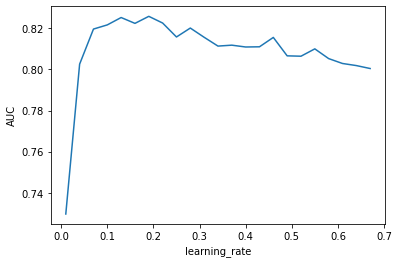

In [ ]:
for learning_rate in learning_rate_range:
    clf = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, n_jobs=-1,seed=8))
    scores = cross_val_score(clf, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(learning_rate)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(learning_rate_range, auc)
plt.xlabel('learning_rate')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 4
El parámetro que mejor calibra el modelo es 0.6


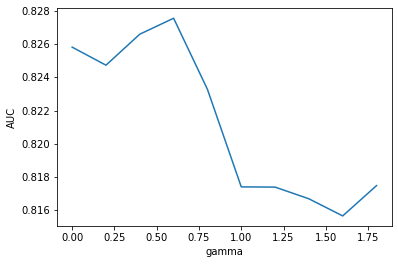

In [ ]:
learning_rate = 0.19
auc=[]
param=[]
for gamma in gamma_range:
    reg = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, gamma=gamma, n_jobs=-1,seed=8))
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(gamma)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(gamma_range, auc)
plt.xlabel('gamma')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 3
El parámetro que mejor calibra el modelo es 0.8


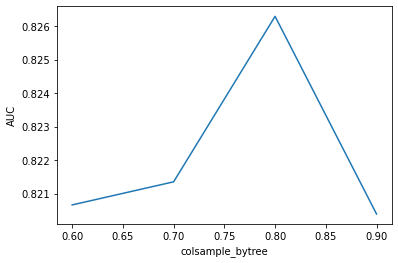

In [ ]:
gamma = param[auc.index(max(auc))]
auc=[]
param=[]
for colsample_bytree in colsample_bytree_range:
    reg = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, n_jobs=-1,seed=8))
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(colsample_bytree)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(colsample_bytree_range, auc)
plt.xlabel('colsample_bytree')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 11
El parámetro que mejor calibra el modelo es 21


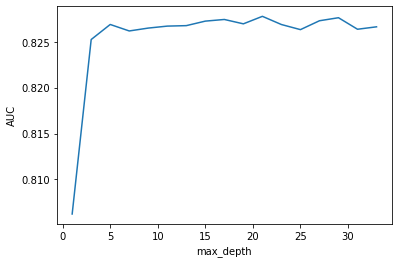

In [ ]:
colsample_bytree = 0.8
auc=[]
param=[]
for max_depth in max_depth_range:
    reg = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, max_depth=max_depth, n_jobs=-1,seed=8))
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(max_depth)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(max_depth_range, auc)
plt.xlabel('max_depth')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 1
El parámetro que mejor calibra el modelo es 1


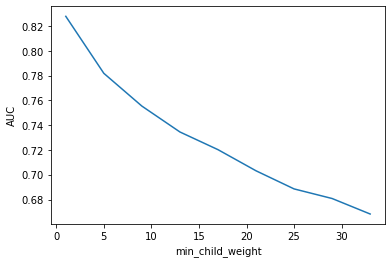

In [ ]:
max_depth=21
auc=[]
param=[]
for min_child_weight in min_child_weight_range:
    reg = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, max_depth=max_depth, min_child_weight=min_child_weight, n_jobs=-1,seed=8))
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(min_child_weight)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(min_child_weight_range, auc)
plt.xlabel('min_child_weight')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

El parámetro que mejor calibra el modelo es 4
El parámetro que mejor calibra el modelo es 0.9


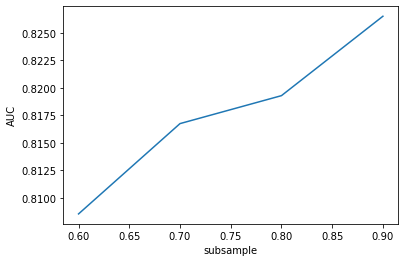

In [ ]:
min_child_weight=1
auc=[]
param=[]
for subsample in subsample_range:
    reg = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, max_depth=max_depth, min_child_weight=min_child_weight,subsample=subsample, n_jobs=-1,seed=8))
    scores = cross_val_score(reg, XTrain2, yTrain2, cv = 3, scoring = 'roc_auc', n_jobs=-1)
    auc.append(np.mean(scores))
    param.append(subsample)

# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(subsample_range, auc)
plt.xlabel('subsample')
plt.ylabel('AUC')

print(f'El parámetro que mejor calibra el modelo es {auc.index(max(auc)) + 1}')
print(f'El parámetro que mejor calibra el modelo es {param[auc.index(max(auc))]}')

In [ ]:
subsample = param[auc.index(max(auc))]

In [ ]:
learning_rate = 0.19


In [ ]:
clfXGB21 = OneVsRestClassifier(XGBClassifier(learning_rate = learning_rate, gamma=gamma, colsample_bytree=colsample_bytree, max_depth=max_depth, min_child_weight=min_child_weight,subsample=subsample, n_jobs=-1,seed=8))
clfXGB21.fit(XTrain4, yTrain4)
ypredTrXGB2 = clfXGB21.predict_proba(XTrain4)
ypredXGB2 = clfXGB21.predict_proba(XTest4)

calculo_metrica(ypredXGB2, yTest4, ypredTrXGB2, yTrain4)

### XGB RandomSearch

In [ ]:
param_test = {
    'lr_rate':[0.15, 0.2, 0.25],
    'gamma':[0, 0.6, 4],
    'colsample_bytree':[0.7, 0.8],
    'max_depth':[5,10,20],
    'min_child_weight':[0,0.5,0.7],
    'subsample':[0.9,1.5,3]
}
rs = RandomizedSearchCV(estimator = XGBClassifier(n_jobs=-1,nthread=4,seed=27),
                        param_distributions = param_test, scoring='roc_auc',n_iter=5,n_jobs=-1, cv=5, verbose=True)
rs.fit(XTrain4,yTrain4)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
rs.best_params_ , rs.best_score_

In [ ]:
clfXGB21 = OneVsRestClassifier(XGBClassifier(learning_rate = 0.2, gamma=4, colsample_bytree=0.8, max_depth=20, min_child_weight=0.5,subsample=0.9, n_jobs=-1,seed=27))
clfXGB21.fit(XTrain2, yTrain2)
ypredTrXGB2 = clfXGB21.predict_proba(XTrain2)
ypredXGB2 = clfXGB21.predict_proba(XTest2)

calculo_metrica(ypredXGB2, yTest2, ypredTrXGB2, yTrain2)

## SGD

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model_resultstfidf = {}

In [ ]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(dataTraining['plot'], y_genres, test_size=0.33, random_state=42)

In [ ]:
countvec = CountVectorizer(ngram_range = (1,3), max_features = 3000)
vec_Xtr = countvec.fit_transform(X_train)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,1), max_df=.85, min_df=15, lowercase=False)
tfidf_Xtr = vectorizer.fit_transform(X_train)

In [ ]:
grid = {
    'loss' : ['hinge', 'log'],
    'penalty' : ['l2', 'l1'],
    'alpha' : [1e-3, 1e-4, 1e-5],
    'max_iter' : [20, 25, 30],
    'class_weight' : ['balanced', None]
}
sgd = SGDClassifier(random_state=42)
sgd_tfidf_gs = GridSearchCV(sgd, param_grid = grid, cv=5)
sgd_tfidf_gs.fit(tfidf_Xtr, y_train_genres)

print(sgd_tfidf_gs.best_score_)
model_resultstfidf['SGD'] = sgd_tfidf_gs.best_score_

ValueError: ignored

## Red neuronal

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
from keras import backend as K
from keras import initializers
from keras import optimizers
from keras.optimizers import SGD
from keras import metrics
from keras.models import Sequential, Model
from keras.layers import LSTM, GRU
from keras.layers.core import Dense, Dropout
from keras.layers import Input
from keras.layers import Embedding
#from keras.layers.recurrent import LSTM
#from keras.layers.core import Dense, Dropout
#from keras.layers import Input
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from livelossplot import PlotLossesKeras

In [ ]:
output_var = yTrain4.shape[1]
dims = XTrain4.shape[1]

In [ ]:
dims, output_var

(1000, 24)

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
NN3 = Sequential()
NN3.add(Dense(64, input_shape=(dims,),activation='relu'))
NN3.add(Dense(64, input_shape=(dims,),activation='relu'))
NN3.add(Dropout(0.5))
NN3.add(Dense(output_var, activation='softmax'))
NN3.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['AUC'])
print(NN3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                2216320   
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                1560      
                                                                 
Total params: 2,222,040
Trainable params: 2,222,040
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [ ]:
NN3.fit(XTrain2, yTrain2, 
          verbose=1, 
          epochs=10, 
          validation_data=(XTest2, yTest2),
          callbacks=[PlotLossesKeras(),best_model, early_stop])

InvalidArgumentError: ignored

In [ ]:
ypredTrNN3 = NN3.predict(XTrain2)
ypredNN3 = NN3.predict(XTest2)
calculo_metrica(ypredNN3,yTest2,ypredTrNN3,yTrain2)

82/82 [==============================] - 2s 19ms/step
El AUC del modelo es de 0.49961303539650775
El R2 del modelo es de -0.16101252431972166

El AUC del modelo en Train es de 0.49978684880944124
El R2 del modelo en Train es de -0.15642441986475417


## Keras classifier

In [ ]:
# Definición de función que crea una red neuronal a partir de diferentes parámetros (nn_model_params)
# En esta función se consideran 7 parámetos a calibrar, sin embargo se pueden agregar o quitar tantos como lo consideren pertinente
def nn_model_params(optimizer ,
                    neurons,
                    batch_size,
                    epochs,
                    activation,
                    patience,
                    loss):
    
    K.clear_session()

    # Definición red neuronal con la función Sequential()
    model = Sequential()
    
    # Definición de las capas de la red con el número de neuronas y la función de activación definidos en la función nn_model_params
    model.add(Dense(neurons, input_shape=(dims,), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(output_var, activation=activation))

    # Definición de función de perdida con parámetros definidos en la función nn_model_params
    model.compile(optimizer = optimizer, loss=loss)
    
    # Definición de la función EarlyStopping con parámetro definido en la función nn_model_params
    early_stopping = EarlyStopping(monitor="val_loss", patience = patience)

    # Entrenamiento de la red neuronal con parámetros definidos en la función nn_model_params
    model.fit(X_train, Y_train,
              validation_data = (X_val, Y_val),
              epochs=epochs,
              batch_size=batch_size,
              callbacks=[early_stopping, PlotLossesKeras()],
              verbose=True
              )
     
    return model

In [ ]:
# Definición de parámetros y sus valores sobre los que se va a calibrar
nn_params = {
    'optimizer': ['adam','sgd'],
    'activation': ['relu'],
    'batch_size': [64,128],
    'neurons':[64,256],
    'epochs':[20,50],
    'patience':[2,5],
    'loss':['mean_squared_error']
}

In [ ]:
# Definición de red neuronal usando el wrapper KerasRegressor y usando como argumento build_fn en la función nn_model_params
nn_model = KerasClassifier(build_fn=nn_model_params, verbose=0)

# Definición método GridSearch para la calibración de parámetros definidos en nn_params
rs = RandomizedSearchCV(nn_model, param_distributions=nn_params, n_iter=5, cv=3)
rs.fit(X_train, Y_train)

print('Los mejores parametros segun Randomnized Search:', rs.best_params_)

In [ ]:
nn_model = KerasRegressor(build_fn=nn_model_params, verbose=0)

# Definición método GridSearch para la calibración de parámetros definidos en nn_params
gs = GridSearchCV(nn_model, nn_params, cv=3)
gs.fit(X_train, Y_train)

print('Los mejores parametros segun Grid Search:', gs.best_params_)

## LSTM

In [ ]:
# Definición máximo largo de embedding
max_url_len = 150

# Codificación (embedding) de la URL con el vocabulario definido anteriormente
X = [x[:max_url_len] for x in X]
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [ ]:
# Definición de embedding con el largo máximo definido anteriormente
max_url_len = 1500
X_pad = pad_sequences(XTrain4.shape[0], maxlen=max_url_len)
X_pad

ValueError: ignored

In [ ]:
# Definición red neuronal con la función Sequential()
lstm = Sequential()

# Definición de la capa embedding
lstm.add(Embedding(XTrain4.shape[0], 128, input_length=dims))
# Definición de la capa recurrente LSTM
lstm.add(LSTM(24))
# Definición de dropout para evitar overfitting
lstm.add(Dropout(0.5))
# Definición capa densa con función sigmoide para predicción binaria final
lstm.add(Dense(yTrain4.shape[1], activation='softmax'))

# Definición de función de perdida.
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])

# Impresión de la arquitectura de la red neuronal
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 34629, 128)        707328    
                                                                 
 lstm_1 (LSTM)               (None, 24)                14688     
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
Total params: 722,616
Trainable params: 722,616
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento de la red neuronal usando el set de entrenamiento
lstm.fit(XTrain2, yTrain2, validation_data=(XTest2, yTest2), 
         batch_size=128, epochs=10, verbose=1,
         callbacks=[PlotLossesKeras()])
ypredLSTM = lstm.predict_proba(XTest2)
ypredTrLSTM = lstm.predict_proba(XTrain2)

InvalidArgumentError: ignored

In [ ]:
calculo_metrica(ypredLSTM, yTest4, ypredTrLSTM, yTrain4)

In [ ]:
# Predicción de la red neuronal usando el set de test
y_pred = model.predict(X_test)
y_pred = np.round(y_pred.flatten()).astype(int)

# Impresión del desempeño de la red neuronal
print((y_pred == y_test).mean())

## GRU

In [ ]:
# Definición red neuronal con la función Sequential()
gru = tf.keras.Sequential()

# Definición de la capa embedding
gru.add(Embedding(XTrain2.shape[0], 128, input_length=XTrain2.shape[1]))
# Definición de la capa recurrente LSTM
gru.add(GRU(64))
# Definición de dropout para evitar overfitting
gru.add(Dropout(0.2))
# Definición capa densa con función sigmoide para predicción binaria final
gru.add(Dense(yTrain2.shape[1], activation='softmax'))

# Definición de función de perdida.
gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['AUC'])

# Impresión de la arquitectura de la red neuronal
gru.summary()

In [ ]:
# Entrenamiento de la red neuronal usando el set de entrenamiento
gru.fit(XTrain2, yTrain2, validation_data=(XTest2, yTest2), 
          batch_size=64, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])
ypredLSTM = gru.predict(XTest2)
ypredTrLSTM = gru.predict(XTrain2)

# ENTRENAMIENTO

In [ ]:
# verify GPU availability
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp
!pip install Keras-Preprocessing

In [ ]:
# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import io

# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

## Modelo BERT

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.5 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
# Cargar el modelo pre-entrenado y el tokenizador de BERT
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=10)  # Aquí se asume que hay 10 géneros de películas

# Sinopsis de ejemplo
sinopsis = "Un grupo de amigos se aventura en una emocionante búsqueda para encontrar un tesoro escondido."

# Preprocesamiento de la sinopsis
tokens = tokenizer.encode_plus(
    sinopsis,
    None,
    add_special_tokens=True,
    max_length=128,  # Ajusta la longitud máxima según tus necesidades
    padding='max_length',
    truncation=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='pt'  # Devuelve tensores de PyTorch
)

# Pasar los tensores a través del modelo
outputs = model(input_ids=tokens['input_ids'], attention_mask=tokens['attention_mask'])

# Obtener las predicciones de género
predictions = outputs.logits.argmax(dim=1).item()

# Mapeo de los índices de género a etiquetas de texto
genre_labels = ['Acción', 'Aventura', 'Comedia', 'Drama', 'Fantasía', 'Horror', 'Romance', 'Ciencia ficción', 'Suspense', 'Western']
predicted_genre = genre_labels[predictions]

# Imprimir el género predicho
print("Género predicho:", predicted_genre)

In [ ]:
train_data.to_list()

In [ ]:
# Cargar el modelo pre-entrenado y el tokenizador de BERT
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=24)  # Aquí se asume que hay 10 géneros de películas

# Preprocesamiento de la sinopsis
tokens = tokenizer.encode_plus(
    train_data.to_list(),
    None,
    add_special_tokens=True,
    max_length=512,  # Ajusta la longitud máxima según tus necesidades
    padding='max_length',
    truncation=True,
    return_token_type_ids=False,
    return_attention_mask=True,
    return_tensors='pt'  # Devuelve tensores de PyTorch
)

# Pasar los tensores a través del modelo
outputs = model(input_ids=tokens['input_ids'], attention_mask=tokens['attention_mask'])

# Obtener las predicciones de género
predictions = outputs.logits.argmax(dim=1).item()

# Mapeo de los índices de género a etiquetas de texto
#genre_labels = dataTraining['genres']
#predicted_genre = genre_labels[predictions]
#print("Género predicho:", predicted_genre)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
genre_labels = dataTraining['genres']
predicted_genre = genre_labels[predictions]
print("Género predicho:", predicted_genre)

Género predicho: ['Crime', 'Drama', 'Thriller']


In [ ]:
pip install transformers

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel, TFAutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(dataTraining['plot'], y_genres, test_size=0.2, random_state=42)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = TFBertModel.from_pretrained('bert-base-uncased')
model = TFAutoModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
train_encodings = tokenizer.batch_encode_plus(
    train_data, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer.batch_encode_plus(
    test_data, truncation=True, padding=True, max_length=512)

In [ ]:
dataTraining['genres']

3107                                       [Short, Drama]
900                               [Comedy, Crime, Horror]
6724                         [Drama, Film-Noir, Thriller]
4704                                              [Drama]
2582                            [Action, Crime, Thriller]
                              ...                        
8417                                    [Comedy, Romance]
1592                         [Action, Adventure, Fantasy]
1723       [Adventure, Musical, Fantasy, Comedy, Romance]
7605    [Animation, Adventure, Drama, Family, Fantasy,...
215               [Animation, Adventure, Family, Fantasy]
Name: genres, Length: 7895, dtype: object

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    tf.keras.utils.to_categorical(train_labels, num_classes=24)))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    tf.keras.utils.to_categorical(test_labels, num_classes=24)))

In [ ]:
help(TFBertModel)

In [ ]:
input_ids = tf.keras.Input(shape=(512,), dtype=tf.int32)
attention_mask = tf.keras.Input(shape=(512,), dtype=tf.int32)

output = model(input_ids=input_ids, attention_mask=attention_mask)[0]
output = tf.keras.layers.GlobalMaxPool1D()(output)
output = tf.keras.layers.Dense(24, activation='softmax')(output)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['AUC'])

In [ ]:
model.fit(train_dataset.shuffle(1000).batch(16),epochs=3,batch_size=16)

Epoch 1/3


ValueError: ignored

In [ ]:
predictions = model.predict(test_dataset.batch(16)).argmax(axis=1)
print(classification_report(test_labels, predictions))

# DISPONIBILIZACIÓN